In [1]:
import os
import pandas as pd

In [2]:
import sys
sys.path.append('../code')

In [3]:
%load_ext autoreload
%autoreload 2

from libs import constants
from libs import io
from libs import scholar

In [4]:
aps_os_data_tar_gz = '../data/final_dataset.tar.gz'
aps_data_path = '../data/aps_20240130_2e52fdd7260ea462878821948a2a463ed9acb58a'

In [5]:
# 1. Read aps-oa data
df_authors = io.read_file_from_tar_gz_as_dataframe(aps_os_data_tar_gz, constants.APS_OA_AUTHORS_FN)
print(f'\n df_authors: {df_authors.shape}  \n {df_authors.head(5)} \n')


 df_authors: (481012, 10)  
     id_author created_date                updated_date          name  \
0  5053051063   2023-07-21  2024-11-04T00:46:12.391095    I. Ben‐Zvi   
1  5067224934   2023-07-21  2024-11-06T10:20:37.304362      T. Roser   
2  5012146130   2023-07-21  2024-11-01T15:52:34.664125   M. Ferrario   
3  5051894783   2023-07-21  2024-11-01T03:49:19.361803  Jean-Luc Vay   
4  5041648606   2023-07-21  2024-11-02T20:12:56.799035   A. Friedman   

                 orcid  two_year_mean_citedness  h_index  i10_index  \
0  0000-0001-5583-0106                 5.416667       33        129   
1  0000-0001-5603-3192                 0.322581       34         89   
2  0000-0002-1105-0359                 2.535714       45        146   
3  0000-0002-0040-799X                 1.581395       34        101   
4  0000-0003-0421-2476                 0.428571       28         97   

   works_count  cited_by_count  
0          783            6034  
1          632            5487  
2          

In [12]:
# 1. Read aps-oa data
df_authors_aps = io.read_csv(io.path_join(aps_data_path, constants.APS_AUTHORS_FN))
print(f'\n df_authors_aps: {df_authors_aps.shape}  \n {df_authors_aps.head(5)} \n')


 df_authors_aps: (874556, 4)  
    id_author  id_gender  disambiguated  id_gender_nq
0          0          0           True             0
1          1          2           True             0
2          2          0           True             0
3          3          2           True             2
4          4          0           True             0 



In [7]:
# Read mapping
df_mapping = io.read_file_from_tar_gz_as_dataframe(aps_os_data_tar_gz, constants.APS_OA_AUTHORS_MAPPING_FN)
print(f'\n df_mapping: {df_mapping.shape}  \n {df_mapping.head(5)} \n')


 df_mapping: (918147, 4)  
    id_author_aps  id_author_oa  confidence_score  mapping_method
0           5651    5061426463               NaN  position_based
1         155456    5064510725               NaN  position_based
2          63926    5111938223               NaN  position_based
3           6745    5052336272               NaN  position_based
4          79395    5110594767               NaN  position_based 



In [24]:
df_mapping.confidence_score.unique()

array([nan, 1. , 0.9, 0.8, 0.7, 0.6, 0.5])

In [8]:
df_mapping.id_author_aps.nunique()

867973

In [9]:
df_mapping.id_author_oa.nunique()

430198

In [11]:
# Missing OA
df_authors.id_author.nunique() - df_mapping.id_author_oa.nunique()

50814

In [13]:
# Missing APS
df_authors_aps.id_author.nunique() - df_mapping.id_author_aps.nunique()

6583

In [14]:
# Which are the OA ids that are missing
df_authors.query('id_author not in @df_mapping.id_author_oa')

,id_author,created_date,updated_date,name,orcid,two_year_mean_citedness,h_index,i10_index,works_count,cited_by_count
3602,5106485754,2024-08-15,2024-11-02T19:49:05.776355,P. Montagna,0000-0001-9647-9420,5.736842,128,695,1589,40265
3603,5107948752,2024-10-10,2024-11-07T10:19:30.193841,A. Lanaro,NaN,2.907895,0,546,1164,50668
3604,5107909554,2024-10-10,2024-11-07T10:15:47.186319,A. Zoccoli,NaN,5.163265,0,737,1003,60837
3605,5009315304,2023-07-21,2024-11-08T21:43:49.409786,G. L. Usaı́,0000-0002-8659-8378,3.222222,100,455,1001,40661
3606,5007781452,2023-07-21,2024-11-02T01:50:26.168509,M. Bruschi,0000-0002-4319-4023,3.916667,58,287,873,18179
...,...,...,...,...,...,...,...,...,...,...
471110,5057920377,2023-07-21,2024-11-06T07:48:41.129551,W. Zhang,NaN,0.000000,3,2,4,37
472225,5059740969,2023-07-21,2024-11-07T11:06:59.695909,Sheng Chu,NaN,5.500000,26,60,90,3229
479502,5100331571,2024-07-11,2024-11-02T10:05:20.247257,Cong Li,0000-0002-1033-9898,3.538462,18,26,69,1112
479541,5074937761,2023-07-21,2024-11-04T18:11:34.115969,Chaohui Yin,0000-0002-4287-0747,3.333333,5,2,14,97


In [15]:
df_authors.query("name.str.contains('Montagna')")

,id_author,created_date,updated_date,name,orcid,two_year_mean_citedness,h_index,i10_index,works_count,cited_by_count
3602,5106485754,2024-08-15,2024-11-02T19:49:05.776355,P. Montagna,0000-0001-9647-9420,5.736842,128,695,1589,40265
6136,5019524712,2023-07-21,2024-11-02T02:45:18.327319,M. Montagna,0000-0002-4914-0843,3.000000,40,130,260,5414
32149,5010569736,2023-07-21,2024-11-04T09:15:00.732113,Gilles Montagnac,0000-0001-9938-0282,4.533333,35,73,210,4330
43185,5107908800,2024-10-10,2024-11-07T10:15:31.136136,G. Montagnac,NaN,0.000000,0,6,8,395
118987,5070272254,2023-07-21,2024-11-05T22:13:36.374025,Mâurine Montagnat,0000-0001-9436-5163,0.538462,30,50,165,2399
124738,5068286456,2023-07-21,2024-11-06T23:12:55.337316,G. Montagna,0000-0002-8446-9177,5.166667,45,111,238,8471
124961,5055894701,2023-07-21,2024-10-18T02:50:31.593161,Raffaele Montagnani,NaN,0.000000,9,8,27,234


In [25]:
# 1. Read aps-oa data
df_authors_stats = io.read_file_from_tar_gz_as_dataframe(aps_os_data_tar_gz, constants.APS_OA_AUTHORS_STATS_FN)
print(f'\n df_authors_stats: {df_authors_stats.shape}  \n {df_authors_stats.head(5)} \n')


 df_authors_stats: (481012, 30)  
     id_author created_date                updated_date             name  \
0  5026494099   2023-07-21  2024-11-06T01:43:50.253103   Axel Kohlmeyer   
1  5056736617   2023-07-21  2024-11-02T00:07:45.799078  Ken‐ichi Hikasa   
2  5108098872   2024-10-10  2024-11-07T10:19:59.704644         J. Ellis   
3  5107907671   2024-10-10  2024-11-07T10:17:48.373886         J. Erler   
4  5056937048   2023-07-21  2024-11-09T09:08:11.142513       T. Gutsche   

                 orcid  two_year_mean_citedness  h_index  i10_index  \
0  0000-0001-6204-6475                   1956.0       19         22   
1  0000-0002-9183-0207                   1336.0       37         62   
2                  NaN                   1336.0        0         38   
3                  NaN                   1336.0        0          8   
4  0009-0004-2403-3883                   1336.0       15        120   

   works_count  cited_by_count  ...  rr3_rank_h_index  \
0           34            700

In [66]:
df_authors_stats['cited_by_count_rank'] = df_authors_stats['cited_by_count'].rank(method='min', ascending=False)
df_authors_stats['cited_by_count_rank'].head(5)

0    40962.0
1     3142.0
2    11358.0
3     3922.0
4     7216.0
Name: cited_by_count_rank, dtype: float64

<Axes: ylabel='Frequency'>

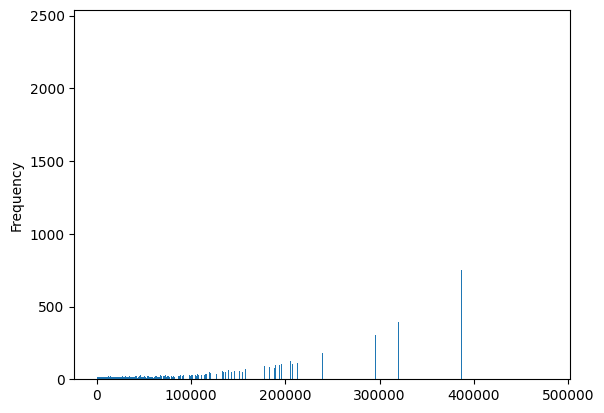

In [67]:
df_authors_stats['cited_by_count_rank'].plot.hist(bins=27530)

In [68]:
df_authors_stats.query("cited_by_count_rank > 1")[['cited_by_count','cited_by_count_rank']].sort_values('cited_by_count')

,cited_by_count,cited_by_count_rank
481011,0,478593.0
234016,0,478593.0
226373,0,478593.0
226369,0,478593.0
231443,0,478593.0
...,...,...
56594,550510,6.0
76735,551008,5.0
60234,632666,4.0
53576,644044,3.0


In [69]:
df_authors_stats.query("cited_by_count <= 10000")[['cited_by_count','cited_by_count_rank']].sort_values('cited_by_count')

,cited_by_count,cited_by_count_rank
481011,0,478593.0
225884,0,478593.0
225875,0,478593.0
225866,0,478593.0
225865,0,478593.0
...,...,...
32852,9998,27458.0
246520,9998,27458.0
3001,10000,27455.0
141501,10000,27455.0


In [70]:
df_authors_stats.cited_by_count.nunique(), df_authors_stats.cited_by_count_rank.nunique()

(27530, 27530)

In [62]:
df_authors_stats.query("cited_by_count_rank>=27530")[['cited_by_count','cited_by_count_rank']].sort_values('cited_by_count')

,cited_by_count,cited_by_count_rank
481011,0,481012.0
228842,0,480010.0
228846,0,480011.0
228847,0,480012.0
228862,0,480013.0
...,...,...
338123,9978,27535.0
268580,9979,27532.0
321382,9979,27533.0
68735,9979,27530.0


In [63]:
df_authors_stats.cited_by_count_rank.sort_values().unique()

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 4.81010e+05,
       4.81011e+05, 4.81012e+05])

In [83]:
author_stats_sorted = {'cited_by_count_rank':df_authors_stats[['id_author','cited_by_count']].sort_values('cited_by_count', ascending=False)}
rankings = {}
total_ranks = df_authors_stats.cited_by_count.nunique()
total_authors = df_authors_stats.id_author.nunique()

for metric, sorted_stats in author_stats_sorted.items():
    rank = 1
    previous_value = None
    for idx, (id, row) in enumerate(sorted_stats.iterrows()):
        
        author_id = row['id_author']

        if author_id not in rankings:
            rankings[author_id] = {}

        key = 'cited_by_count'

        # If values are the same as the previous, they share the rank
        current_value = row[key]
        if idx > 0 and current_value == previous_value:
            rankings[author_id][metric] = rank - 1  # Keep the same rank as the previous one
        else:
            rankings[author_id][metric] = rank  # Assign new rank

        # Calculate percentile ranking
        percentile_rank = (1 - (rank - 1) / (total_authors - 1)) * 100

        if percentile_rank < 0:
            print(current_value, rank, percentile_rank)

        rankings[author_id][f"{metric}_percentile"] = round(percentile_rank, 2)
        previous_value = current_value
        rank += 1


In [99]:
tmp = [obj1['cited_by_count_rank'] for aid, obj1 in rankings.items()]
min(tmp), max(tmp), total_authors

(1, 481011, 481012)

In [98]:
import numpy as np
np.unique(tmp).shape

((465500,), 481012)

<Axes: ylabel='Frequency'>

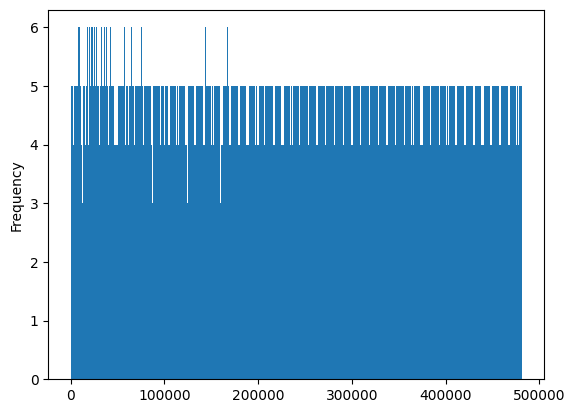

In [102]:
import pandas as pd

pd.Series(tmp).plot.hist(bins=100000)

In [103]:
tmp = [obj1['cited_by_count_rank_percentile'] for aid, obj1 in rankings.items()]
min(tmp), max(tmp)

(0.0, 100.0)

In [104]:
import numpy as np
np.unique(tmp).shape

(10001,)

In [105]:
tmp

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.98,
 99.97,
 99.97,
 99.97,
 99.97,


<Axes: ylabel='Frequency'>

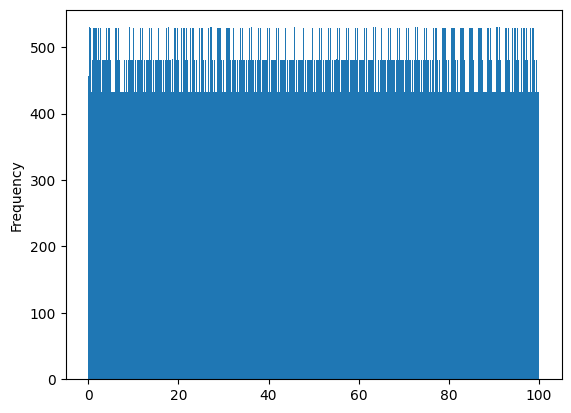

In [110]:
import pandas as pd

pd.Series(tmp).sort_values().plot.hist(bins=1000)